In [421]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, stats
import scipy.stats as stats

### Distribucion normal de media 10, desvio estandar 2

In [422]:
def generar_normal(N):
    U1=np.random.rand(N)
    U2=np.random.rand(N)
    S=np.random.rand(N)
    X=[]
    X11=[]

    def f1(u):
     return -1*np.log(U1[i])

    def f2(x):
     return np.exp(-1/2 * (x-1)**2 ) 

    def f3(x,m,v):
      return x*np.sqrt(v)+m

    for i in range (N):
      X1=f1(U1[i])
      if (U2[i] <=f2(X1)):
        X11.append(X1)
        if S[i] <= 0.5:
          X.append(X1)
        else:
           X.append(-1*X1)

    #Distribucion Normal (10, 2)

    b = 10
    c = 2**2

    Z = []
    for i in X:
      Z.append (f3(i,b,c))

    plt.hist( Z,'sturges',density= True)
    plt.title('Histograma de X')
    plt.xlabel ('X')
    plt.show()
    print ('Media: ',np.mean(Z))
    print ('Varianza: ',np.var(Z))
    
    return Z

# Prueba de  Kolmogorov Smirnov

In [425]:
def qq_plot(Z):
    fig, ax = plt.subplots(figsize = (10,6))
    stats.probplot(Z, dist="norm", plot=ax)
    plt.title("Normal Q-Q plot")
    plt.grid()
    plt.show()

def probas_acumuladas(Z, intervalo):
    probabilidades_acumuladas = [] 
    valores = list(np.arange(-3, 3.1, intervalo))
    acumulado = 0
    MU = np.mean(Z)
    SIGMA = np.std(Z)
    N = len(Z)
    for i in valores:
        acumulado = 0
        for valor in Z:
            valor = (valor - MU) / SIGMA
            if valor <= i:
                acumulado += 1
        probabilidades_acumuladas.append(acumulado / N)
    return probabilidades_acumuladas

def tabla_normal_acumulada(intervalo):
    n = 6/intervalo
    domain = np.linspace(-3,3, int(n))
    normal_acumulada = norm.cdf(domain, 0, 1)
    return normal_acumulada
    
def calcular_estadistico(normal_acumulada, probabilidades_acumuladas):
    D = 0
    for index in range(len(normal_acumulada)):
        delta = abs(normal_acumulada[index] - probabilidades_acumuladas[index])
        if delta > D:
            D = delta
    print("Estadistico D: {}".format(D))
    return D

def calcular_q(N):
    q = 1.36/np.sqrt(N)
    print("p-valor: {}".format(q))
    return q

def plotear_distribucion(probabilidades_acumuladas, intervalo):
    fig, ax = plt.subplots(figsize = (10,6))
    valores = list(np.arange(-3, 3.1, intervalo))
    n = 6/intervalo
    domain = np.linspace(-3,3, int(n))
    ax.plot(valores, probabilidades_acumuladas, color = 'blue', label = 'Distribucion acumulada empirica')
    ax.plot(domain, norm.cdf(domain, 0, 1), color = 'red', label = 'Distribucion acumulada teorica')
    plt.title("Distribuciones acumuladas (estandarizada)")
    plt.legend()
    plt.grid()
    plt.show()
        
def test_KS(Z):
    N = len(Z)
    intervalo = 0.01
    probabilidades_acumuladas = probas_acumuladas(Z, intervalo)
    plotear_distribucion(probabilidades_acumuladas, intervalo)
    normal_acumulada = tabla_normal_acumulada(intervalo)
    D = calcular_estadistico(normal_acumulada, probabilidades_acumuladas)
    q = calcular_q(N)
    if (D < q):
        print("\np-valor > D -> No hay evidencia suficiente para rechazar que la distribucion generada no es normal.")
    else:
        print("\nSe puede rechazar la hipotesis: la distribucion no es normal.")


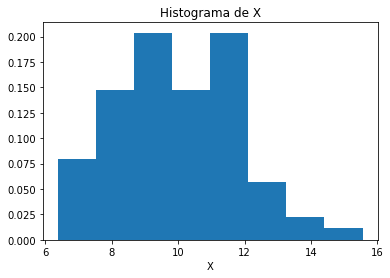

Media:  10.016446261445171
Varianza:  3.640006923603701


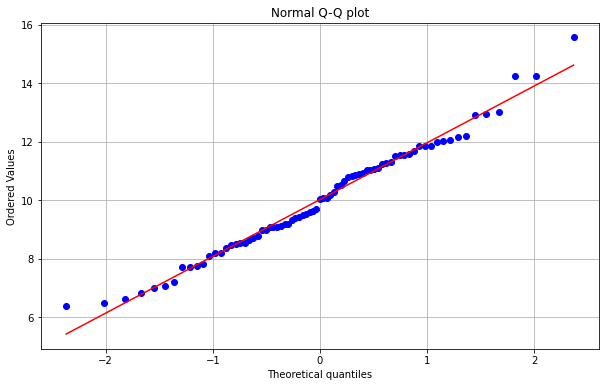

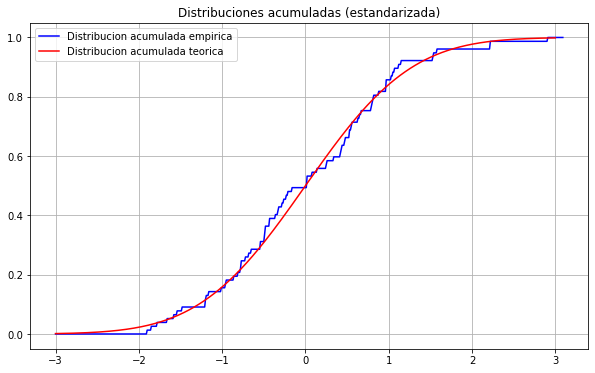

Estadistico D: 0.06378000516559679
p-valor: 0.1549863839851076

p-valor > D -> No hay evidencia suficiente para rechazar que la distribucion generada no es normal.


In [426]:
Z = generar_normal(N = 100)
qq_plot(Z)
test_KS(Z)

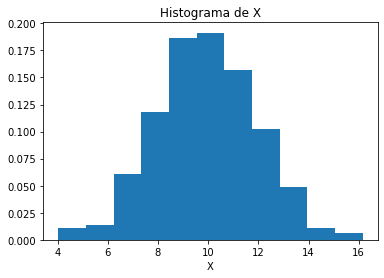

Media:  9.905331692927072
Varianza:  3.9853617478447383


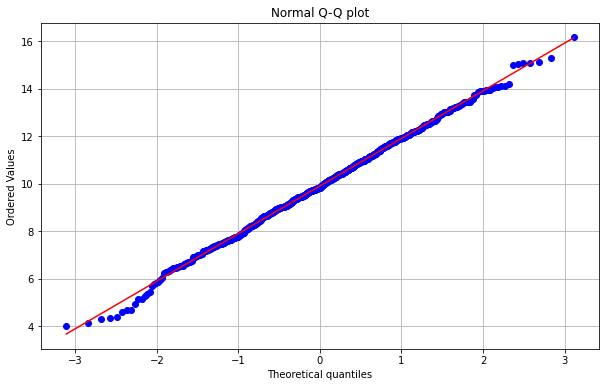

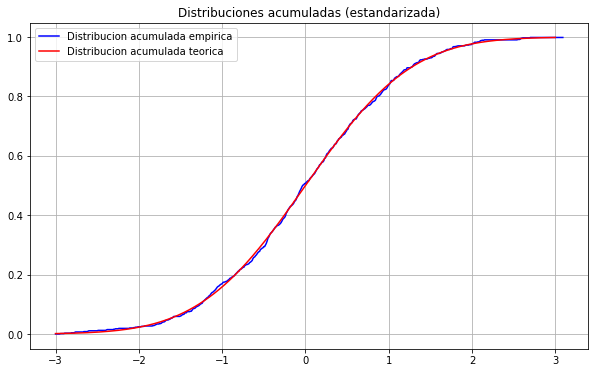

Estadistico D: 0.01919621552852463
p-valor: 0.04986001910726012

p-valor > D -> No hay evidencia suficiente para rechazar que la distribucion generada no es normal.


In [427]:
Z = generar_normal(N = 1000)
qq_plot(Z)
test_KS(Z)

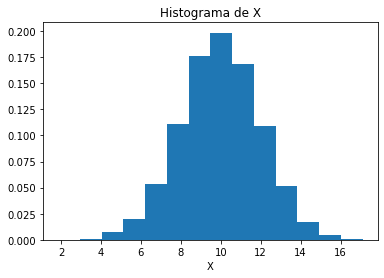

Media:  9.972252311541078
Varianza:  3.939320438374598


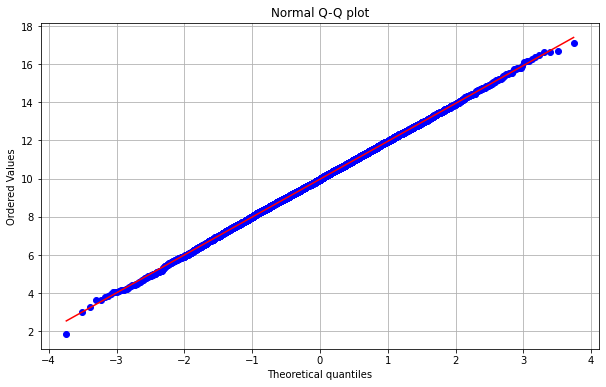

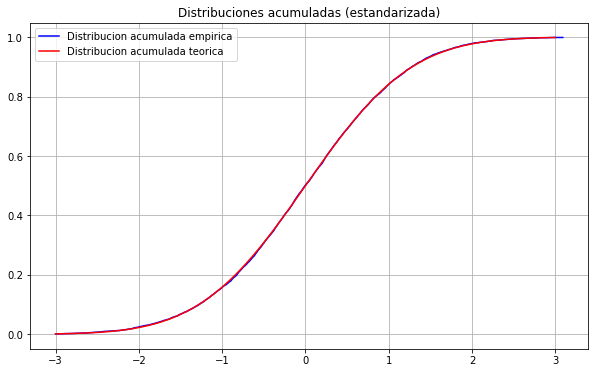

Estadistico D: 0.006879505178291334
p-valor: 0.015634249607943736

p-valor > D -> No hay evidencia suficiente para rechazar que la distribucion generada no es normal.


In [428]:
Z = generar_normal(N = 10000)
qq_plot(Z)
test_KS(Z)